<a href="https://colab.research.google.com/github/cbonnin88/Soundstream_Project/blob/main/User_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import gdown as gd
import plotly.graph_objects as go

In [ ]:
url = "https://drive.google.com/uc?id=1mT1mvIkEliFfRP4JPC7dTjrdy412zs1x"
gd.download(url,"Soundstream_user_data.csv",quiet=True)

df_userdata = pd.read_csv('Soundstream_user_data.csv')
df_userdata.head(10)

,user_id,signup_date,action,timestamp,subscription_type,device,monthly_revenue
0,user_635,2024-05-19,upgrade_premium,2024-12-11 9:44:07,premium,mobile,10
1,user_343,2024-05-07,like_song,2024-10-26 21:53:35,free,mobile,0
2,user_185,2024-05-24,like_song,2024-11-17 22:32:06,premium,desktop,10
3,user_613,2024-05-16,logout,2024-11-02 11:43:13,premium,mobile,10
4,user_407,2024-05-20,create_playlist,2024-08-24 8:56:55,premium,mobile,10
5,user_787,2024-05-25,create_playlist,2024-08-31 1:21:19,premium,mobile,10
6,user_161,2024-05-28,upgrade_premium,2024-10-02 15:49:51,premium,desktop,10
7,user_33,2024-05-22,stream_song,2024-09-17 21:22:07,premium,desktop,10
8,user_878,2024-05-04,like_song,2024-11-13 15:40:41,free,mobile,0
9,user_209,2024-05-27,stream_song,2024-12-21 11:00:06,free,desktop,0


In [ ]:
# Segment data by subscription type
segmentation = df_userdata.groupby('subscription_type').agg(
    total_users=('user_id','nunique'),
    total_actions=('action','count'),
    avg_revenue=('monthly_revenue','mean'),
    total_revenue=('monthly_revenue','sum')
).reset_index()

print(segmentation)

  subscription_type  total_users  total_actions  avg_revenue  total_revenue
0              free          993           4966          0.0              0
1           premium          994           5034         10.0          50340


# **Revenue Distribution**

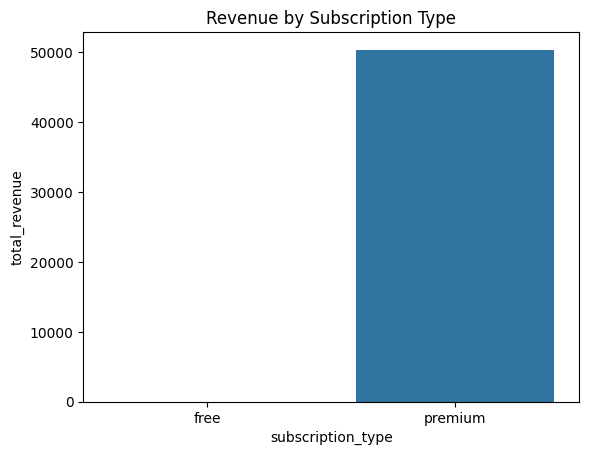

In [ ]:
sns.barplot(
    data=segmentation,
    x='subscription_type',
    y='total_revenue'
)

plt.title("Revenue by Subscription Type")
plt.show()

In [ ]:
# Segmentation by Device
segmentation_by_device = df_userdata.groupby(['subscription_type','device']).agg(
    total_users=('user_id','nunique'),
    total_actions=('action','count'),
    avg_revenue=('monthly_revenue','mean'),
    total_revenue=('monthly_revenue','sum')
).reset_index()

print(segmentation_by_device)

  subscription_type   device  total_users  total_actions  avg_revenue  \
0              free  desktop          814           1657          0.0   
1              free   mobile          817           1714          0.0   
2              free   tablet          801           1595          0.0   
3           premium  desktop          811           1675         10.0   
4           premium   mobile          804           1607         10.0   
5           premium   tablet          825           1752         10.0   

   total_revenue  
0              0  
1              0  
2              0  
3          16750  
4          16070  
5          17520  


In [ ]:
# Segmentation by Action
segmentation_by_action = df_userdata.groupby(['subscription_type', 'action']).agg(
    total_users=('user_id', 'nunique'),
    total_actions=('action', 'count'),
    avg_revenue=('monthly_revenue', 'mean'),
    total_revenue=('monthly_revenue', 'sum')
).reset_index()

print(segmentation_by_action)

  subscription_type           action  total_users  total_actions  avg_revenue  \
0              free  create_playlist          650           1037          0.0   
1              free        like_song          603            988          0.0   
2              free           logout          621            952          0.0   
3              free      stream_song          633            977          0.0   
4              free  upgrade_premium          639           1012          0.0   
5           premium  create_playlist          619            958         10.0   
6           premium        like_song          645           1040         10.0   
7           premium           logout          642           1005         10.0   
8           premium      stream_song          621            974         10.0   
9           premium  upgrade_premium          669           1057         10.0   

   total_revenue  
0              0  
1              0  
2              0  
3              0  
4            

In [ ]:
segmentation_combined = df_userdata.groupby(['subscription_type', 'device', 'action']).agg(
    total_users=('user_id', 'nunique'),
    total_actions=('action', 'count'),
    avg_revenue=('monthly_revenue', 'mean'),
    total_revenue=('monthly_revenue', 'sum')
).reset_index()

print(segmentation_combined)

   subscription_type   device           action  total_users  total_actions  \
0               free  desktop  create_playlist          283            335   
1               free  desktop        like_song          290            355   
2               free  desktop           logout          271            312   
3               free  desktop      stream_song          267            304   
4               free  desktop  upgrade_premium          309            351   
5               free   mobile  create_playlist          305            364   
6               free   mobile        like_song          285            344   
7               free   mobile           logout          286            334   
8               free   mobile      stream_song          290            337   
9               free   mobile  upgrade_premium          285            335   
10              free   tablet  create_playlist          291            338   
11              free   tablet        like_song          250     

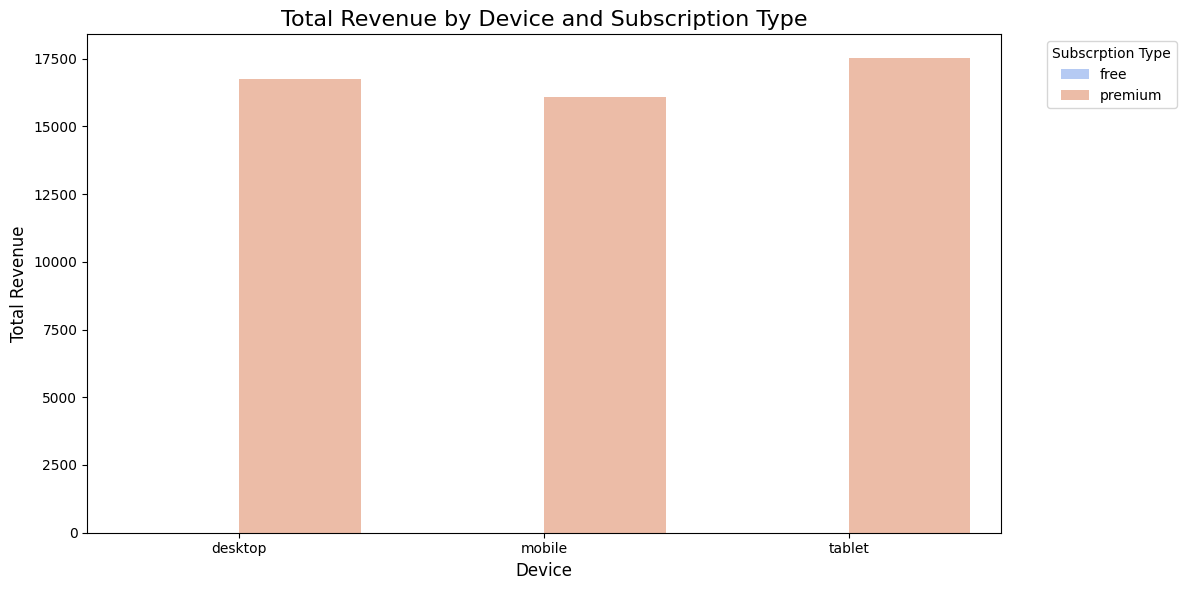

In [ ]:
plt.figure(figsize=(12,6))

sns.barplot(
    data=segmentation_by_device,
    x='device',
    y='total_revenue',
    hue='subscription_type',
    palette='coolwarm'
)

plt.title('Total Revenue by Device and Subscription Type', fontsize=16)
plt.xlabel('Device',fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.legend(title='Subscrption Type', loc='upper right',bbox_to_anchor=(1.2,1))
plt.tight_layout()

plt.show()